# 1- Importing libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

# 2- Data overview

# 2.1 - Load the data

In [2]:
df = pd.read_csv('diabetes2.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2.2 - Data understanding

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [46]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
print ( "Number of 0's in Glucose column : " , df['Glucose'].isin([0]).sum() )
print ( "Number of 0's in blood pressure column : ", df['BloodPressure'].isin([0]).sum() )
print ( "Number of 0's in skin thickness column : ", df['SkinThickness'].isin([0]).sum() ) 
print ( "Number of 0's in insulin  column : ", df['Insulin'].isin([0]).sum()  )
print ( "Number of 0's in BMI column : ", df['BMI'].isin([0]).sum() )
print ( "Number of 0's in diabetes Pedigree function column : ", df['DiabetesPedigreeFunction'].isin([0]).sum() )
print ( "Number of 0's in age column : ", df['Age'].isin([0]).sum())

Number of 0's in Glucose column :  5
Number of 0's in blood pressure column :  35
Number of 0's in skin thickness column :  227
Number of 0's in insulin  column :  374
Number of 0's in BMI column :  11
Number of 0's in diabetes Pedigree function column :  0
Number of 0's in age column :  0


# 2.3 - Data visualization

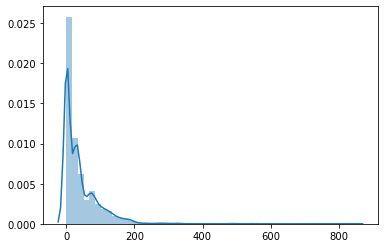

In [9]:
# To plot the distributution of the data
sns.distplot(df)

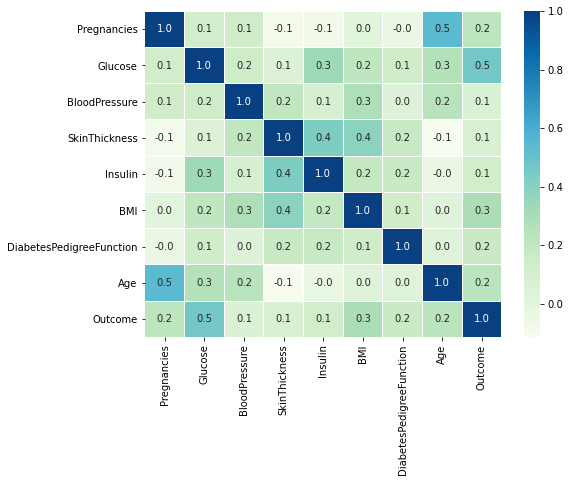

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

In [10]:
# To plot correlation between columns
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), cmap="GnBu", annot=True, linewidths=0.1, fmt= '.1f',ax=ax)
plt.show()
df.corr().Outcome.sort_values()

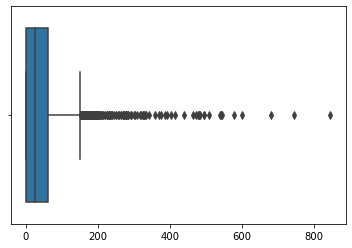

In [11]:
sns.boxplot(df)

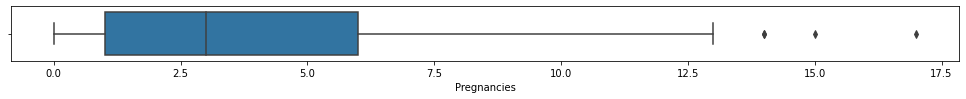

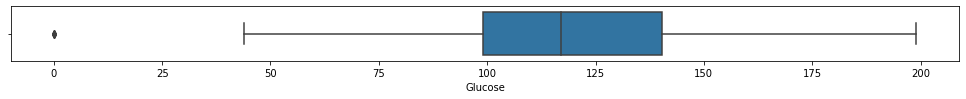

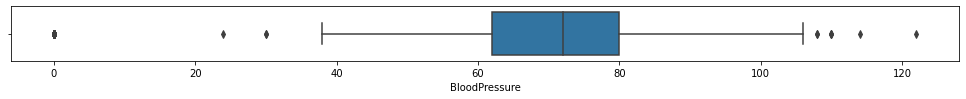

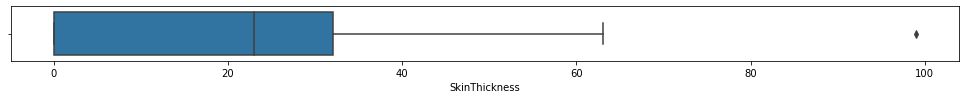

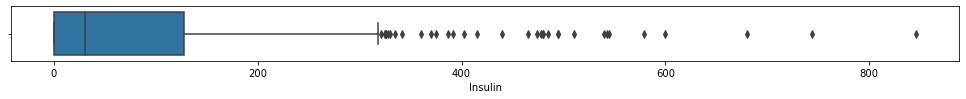

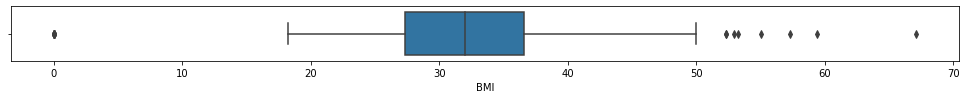

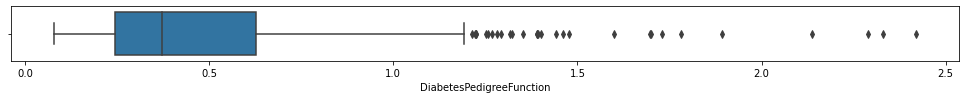

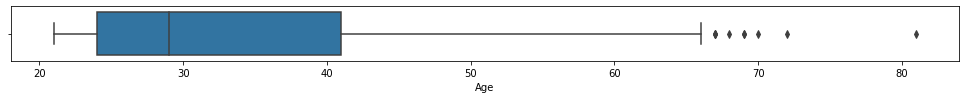

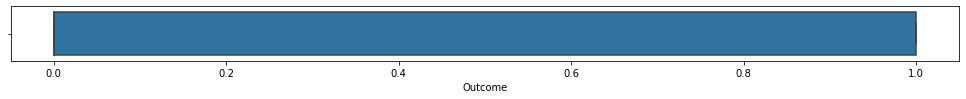

In [12]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)
# There are extreme values in all columns ( except for sure the predicted column which is the outcome )

# 3 - Data preprocessing / preparation

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
print ( "Percentage of missing data in Glucose column : " , df['Glucose'].isin([0]).sum() / 768 * 100 )
print ( "Percentage of missing data in blood pressure column : ", df['BloodPressure'].isin([0]).sum() / 768 * 100 )
print ( "Percentage of missing data in skin thickness column : ", df['SkinThickness'].isin([0]).sum() / 768 * 100 ) 
print ( "Percentage of missing data in insulin  column : ", df['Insulin'].isin([0]).sum() / 768 * 100 )
print ( "Percentage of missing data in BMI column : ", df['BMI'].isin([0]).sum() / 768 * 100 )

Percentage of missing data in Glucose column :  0.6510416666666667
Percentage of missing data in blood pressure column :  4.557291666666666
Percentage of missing data in skin thickness column :  29.557291666666668
Percentage of missing data in insulin  column :  48.69791666666667
Percentage of missing data in BMI column :  1.4322916666666665


In [15]:
# To replace zeros in some columns with median values except pregnancies and outcome columns
df['Glucose'] = df['Glucose'].replace( 0 , df['Glucose'].median() )
df['BloodPressure'] = df['BloodPressure'].replace( 0 , df['BloodPressure'].median() )
df['SkinThickness'] = df['SkinThickness'].replace( 0 , df['SkinThickness'].median() )
df['Insulin'] = df['Insulin'].replace( 0 , df['Insulin'].median() )
df['BMI'] = df['BMI'].replace( 0 , df['BMI'].median() )
# To make sure that the values are replaced correctly
print ( df.isin([0]).sum() )
print ( df.head() )

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# 4- Modeling 

# 4.1 - Split the data

In [16]:
# split the data
x = df.drop(['Outcome'],axis = 1)
y = df.Outcome
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state = 110 )
x_train.shape ,y_train.shape  
# random_state is a random value used in splitting ( parameter is used for initializing the internal random number generator,
#which will decide the splitting of data into train and test indices in this case. )

((614, 8), (614,))

In [17]:
# To see the size of data after splitting
print("Size of original dataset :", df.shape)
print("Size of input - training set", x_train.shape)
print("Size of output - training set", y_train.shape)
print("Size of input - testing set", x_test.shape)
print("Size of output - testing set", y_test.shape)

Size of original dataset : (768, 9)
Size of input - training set (614, 8)
Size of output - training set (614,)
Size of input - testing set (154, 8)
Size of output - testing set (154,)


# 4.2 - Train on part of data using Logistic Regression model

In [19]:
model = LogisticRegression()
model.fit(x_train,y_train)

D:\nouran\programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 4.3 - Test the model 

In [20]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

# 5 - Evaluation

In [21]:
# To calculate the model accuracy
model.score(x_test,y_test)*100  

80.51948051948052

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



In [23]:
matrix = confusion_matrix(y_test, model.predict(x_test))
print ( matrix )

[[96 11]
 [19 28]]


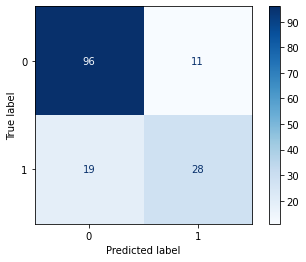

In [31]:
plot_confusion_matrix( model , x_test, y_test, cmap=plt.cm.Blues);

In [32]:
parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 'C': [1.0 , 0.1 , 0.01 , 1.1 , 10.0],
             'max_iter' : [10,100,500]} 
# penalty : punishing the model upon making error
# max_iter : number of loops made at the data
# C : a high Hyper Parameter value C indicates that training data 
      # smaller values specify stronger regularization ,  whereas low value is just the opposite of this.
best_model = GridSearchCV(model, parameters)
best_model.fit(x_train , y_train)

D:\nouran\programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\nouran\programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\nouran\programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\nouran\programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\nouran\programs\Anaconda\lib\site-packages\sklearn\lin

D:\nouran\programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\nouran\programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\nouran\programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\nouran\programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\nouran\programs\Anaconda\lib\site-packages\skl

D:\nouran\programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\nouran\programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\nouran\programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\nouran\programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\nouran\programs\Anaconda\lib\site-packages\skl

D:\nouran\programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\nouran\programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

D:\nouran\programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\nouran\programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\nouran\programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\nouran\programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\nouran\programs\Anaconda\lib\site-packages\sklearn\lin

D:\nouran\programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\nouran\programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\nouran\programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\nouran\programs\Anaconda\lib\site-packages\s

D:\nouran\programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\nouran\programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01, 1.1, 10.0],
                         'max_iter': [10, 100, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [33]:
# To determine the best parameters for the moel using grid search 
print( best_model.best_params_ )

{'C': 1.0, 'max_iter': 500, 'penalty': 'none'}


In [34]:
best_model = LogisticRegression( penalty = 'none' , max_iter = 500 )
best_model.fit(x_train , y_train)

LogisticRegression(max_iter=500, penalty='none')

In [47]:
# To calculate the model accuracy after Hyperparameter Tunning
best_model.score(x_test , y_test) * 100

83.11688311688312

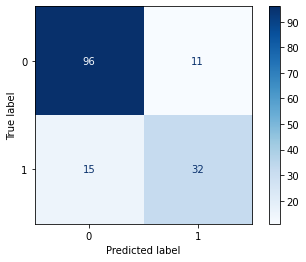

In [48]:
plot_confusion_matrix( best_model , x_test, y_test, cmap=plt.cm.Blues);